<a href="https://colab.research.google.com/github/farheenfathimaa/TensorFlow-DeepLearning/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow
In this notebook we're going to learn how to write neural networks for classification problems.

A **classification** is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Mutliclass classification
* Multilabel classification

See full course materials on GitHub: [link](https://github.com/mrdbourke/tensorflow-deep-learning/)

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

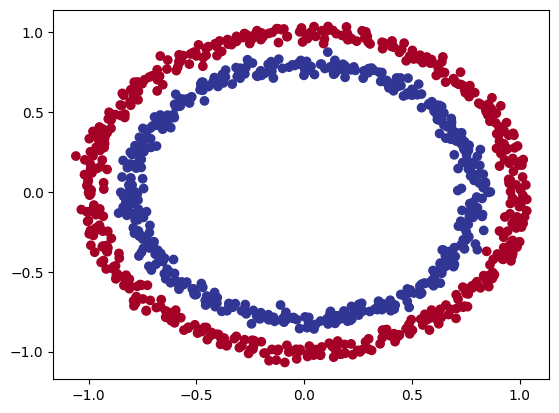

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

🛠 Exercise: Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.36999&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=fals) building and running different neural networks. See what happens when you change different hyperparameters.


## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...
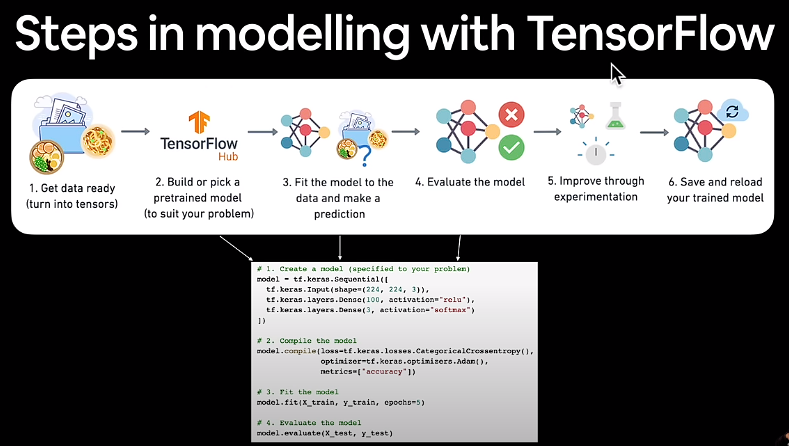

In [10]:
# Import tensorflow
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 4.4333 - accuracy: 0.4630
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 3.9018 - accuracy: 0.4750
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 1.7709 - accuracy: 0.4820
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7363 - accuracy: 0.4930
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7076 - accuracy: 0.4940


In [11]:
# Let's try and improve our model by training it for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4910


[0.6966016888618469, 0.4909999966621399]

## Improving our model
Let's look into our bag of tricks to see how we can improve our model.

1. **Create a model** - we might to add more layers or increase the number of hidden units within a layer.
2. **Compiling a model** - here we might to choose a different optimization function such as Adam instead of SGD.
3. **Fitting a model** - perhaps we might fit our model for more epochs (leave it training for longer).

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model(3 layers this time)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # added 100 dense neurons
    tf.keras.layers.Dense(10), # added another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4890


[0.6932426691055298, 0.48899999260902405]

**🔑 Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


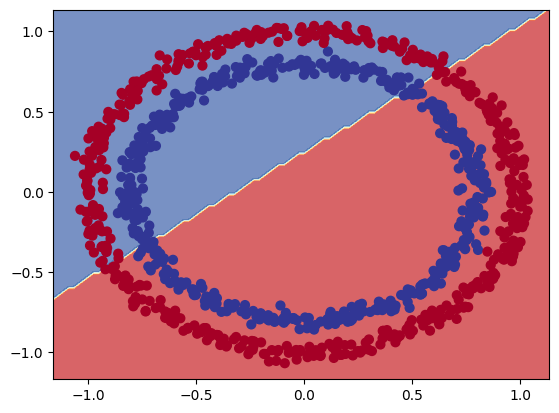

In [18]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [19]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our rmodel to the regression data
#model_3.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [20]:
# Enable NumPy behavior for TensorFlow tensors
tf.experimental.numpy.experimental_enable_numpy_behavior()

# Now you can use NumPy-like methods on tensors
X_reg_train = X_reg_train.reshape(-1, 1)
X_reg_test = X_reg_test.reshape(-1, 1)
y_reg_train = y_reg_train.reshape(-1, 1)
y_reg_test = y_reg_test.reshape(-1, 1)

In [21]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 408.2318 - mae: 408.2318
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 250.0655 - mae: 250.0655
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 99.3207 - mae: 99.3207
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 71.5370 - mae: 71.5370
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 90.3024 - mae: 90.3024
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 55.6736 - mae: 55.6736
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 49.7439 - mae: 49.7439
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 43.8726 - mae: 43.8726
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 48.1323 - mae: 48.1323
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 44.0304 - mae: 44.0304
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step


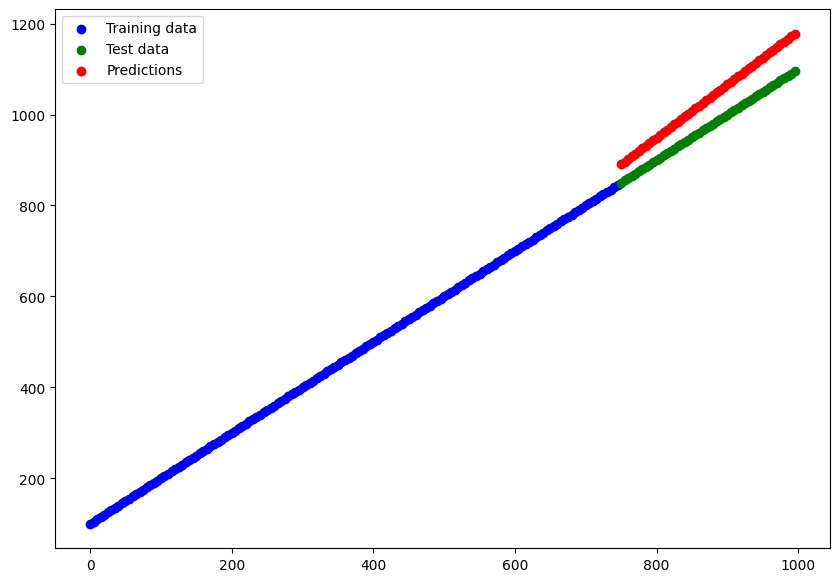

In [22]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity
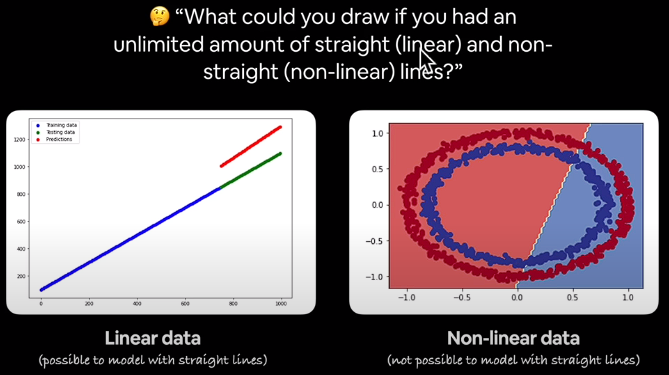

In [34]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.4102 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4055 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4040 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4028 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3849 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3667 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3638 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3635 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3632 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3629 - accuracy: 0.4910
Epoch 11/

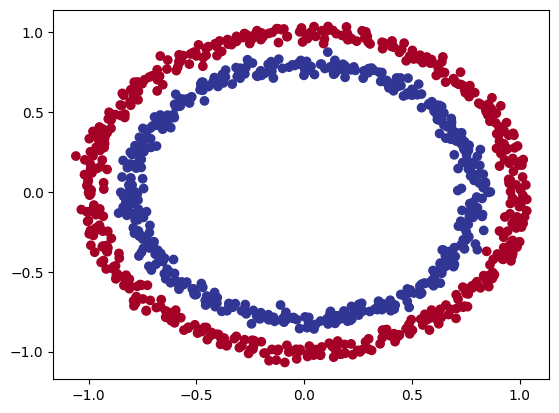

In [35]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


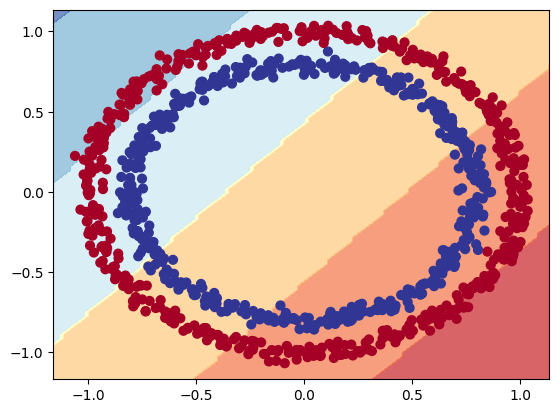

In [36]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [37]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3298 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1976 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0255 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8367 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7316 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6155 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 3.5535 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3598 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2284 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1009 - accuracy: 0.5000
Epoch 11/

In [38]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 2s 5ms/step - loss: 4.3978 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 5ms/step - loss: 3.7528 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 5ms/step - loss: 3.1961 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 2.4074 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 1.3538 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 1.1741 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0583 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9756 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9166 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8728 - accuracy: 0.5000
Epoch 11/

In [39]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9900


[0.06732814013957977, 0.9900000095367432]

313/313 [==============================] - 2s 5ms/step
doing binary classification


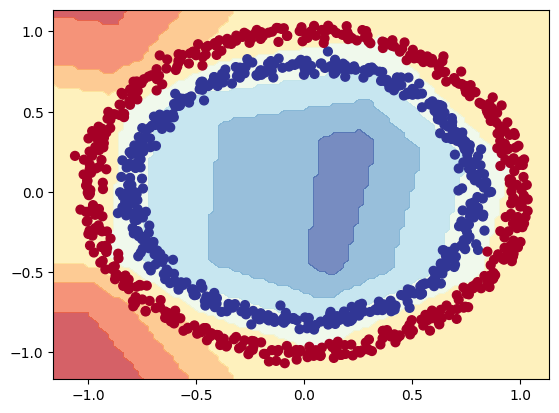

In [40]:
# How do our model predictions look?
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [43]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5040
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5020
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5020
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5060
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5080
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.4980
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5100
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5110
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5090
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5100
Epoch 11/

In [44]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1116 - accuracy: 0.9890


[0.1116400957107544, 0.9890000224113464]

313/313 [==============================] - 1s 2ms/step
doing binary classification


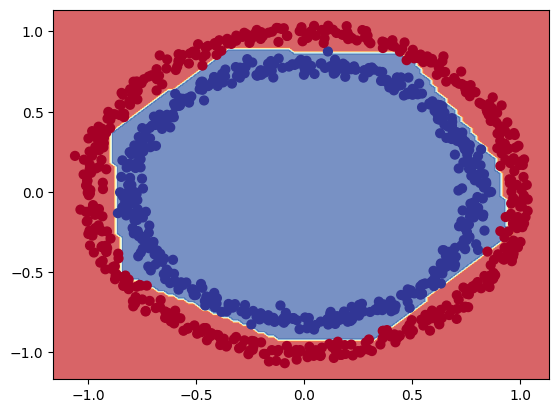

In [45]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**🤔 Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**🔑 Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.